# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques like regularization that are used to avoid overfitting (but haven't practiced this yet). In this lesson we'll discuss a fundamental method for avoid overfitting that is commonly referred to a the _train/test split_. 

The idea is very similar to something called "cross-validation" (indeed it is a type of cross-validation) in that we split the dataset into two subsets:
* a subset to train our model on, and
* a subset to test our model's predictions on

This serves two useful purposes:
* We prevent overfitting by not using all the data, and
* We have some remaining data to evaluate our model.

While it may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed 80% of data from California and 20% elsewhere and is sorted by state. If we split our data into 80% training data and 20% testing data we ight inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them. holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

### Here's what we will be doing:

* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Folds**

* Try a few different splits of the data for the same models.
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?

Try a variety of response variables.  Start with **MEDV** / .target attribute from the dataset load method.

In [45]:
# blank

### 1. Clean up any data
Load the Boston housing data.  Fix any problems, if applicable.

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split #new package
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

% matplotlib inline


boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
X = X[['LSTAT','RM','INDUS','TAX','CRIM']]
y = pd.DataFrame(boston.target)

# :Attribute Information (in order):
# - CRIM     per capita crime rate by town 
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft
# - INDUS    proportion of non-retail business acres per town 
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)

# - RM       average number of rooms per dwelling 
# - AGE      proportion of owner-occupied units built prior to 1940 
# - DIS      weighted distances to five Boston employment centres 
# - RAD      index of accessibility to radial highways        
# - TAX      full-value property-tax rate per $10,000        
# - PTRATIO  pupil-teacher ratio by town 
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        
# - LSTAT    % lower status of the population        
# - MEDV     Median value of owner-occupied homes in $1000's



## Using Sklearn Linear Regression

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on
Score and plot your predictions.

Score: 0.669802807721


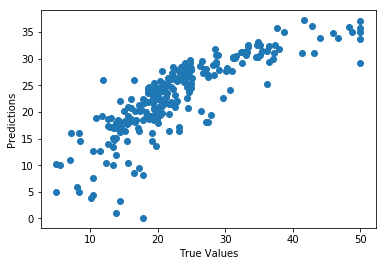

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# fit a model
lm = linear_model.LinearRegression()

# pass in the training set
model_50_50 = lm.fit(X_train, y_train)
predictions = model_50_50.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# default returns r^2
print "Score:", model_50_50.score(X_test, y_test)     


### 3. Try 70/30 and 90/10
Score and plot.  How do your metrics change?

Score: 0.705350854289


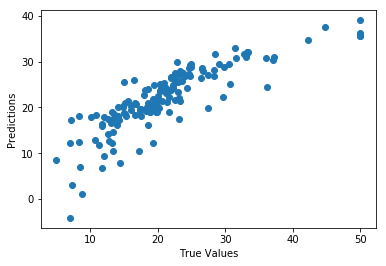

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# fit a model
lm = linear_model.LinearRegression()

# pass in the training set
model_70_30 = lm.fit(X_train, y_train)
predictions = model_70_30.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# default returns r^2
print "Score:", model_70_30.score(X_test, y_test)     


Score: 0.811134930772


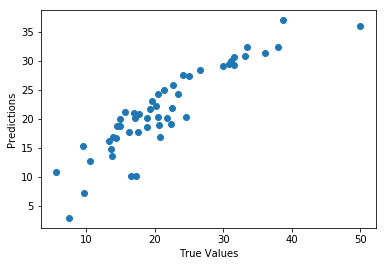

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# fit a model
lm = linear_model.LinearRegression()

# pass in the training set
model_90_10 = lm.fit(X_train, y_train)
predictions = model_90_10.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# default returns r^2
print "Score:", model_90_10.score(X_test, y_test)     


As the size of the test set decreases, the model score increases.

### 4. Try K-Folds between 5-10 for your regression. 

What seems optimal?  How do your scores change?  What the variance like?  Try different folds to get a sense of how this impacts your score.

Cross-validated scores: [ 0.63230358  0.5966557  -0.82051451  0.49550244  0.64880236  0.51015686
 -0.3105974  -0.15679179 -1.53421103  0.24342589]
Cross-Predicted Accuracy: 0.524795610252


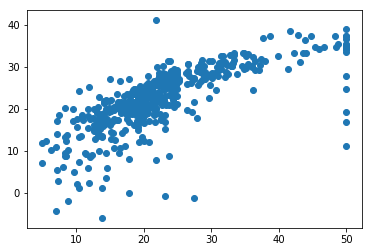

In [5]:
model = model_70_30
df = X
folds=10
scores = cross_val_score(model, df, y, cv=folds)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=folds)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy


# k=5 : Cross-validated scores: [ 0.59136074  0.70343664  0.42960257  0.01155629 -0.38848846]
# Cross-Predicted Accuracy: 0.502173262814

# k=7 : Cross-validated scores: [ 0.60668994  0.58364016  0.53707471  0.49679319  0.20187549 -0.40036359
#   0.02481712]
# Cross-Predicted Accuracy: 0.472040784379

# k=10 : Cross-validated scores: [ 0.63230358  0.5966557  -0.82051451  0.49550244  0.64880236  0.51015686
#  -0.3105974  -0.15679179 -1.53421103  0.24342589]
# Cross-Predicted Accuracy: 0.524795610252

# Regardless of test/train split, cross-validated scores and cross-predicted accuracy are the same
# these scores are dependent on the number of folds
# as the number of folds increases, the cross-predicted accuracy increases


# Enrichment: Everything beyond this point is enrichment and examples

## Example: Using Statsmodels Formula

Adapt the formula example using your metrics.  We will review the implementation in class.  Here is a reference to consider.  The workflow is the same, but the syntax is a little different.  We want to get accustomed to the formula syntax because we will be using them a lot more with regressions.  The results should be comparable to Sklearn's regression models.


In [6]:
# First, format our data in a nice DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Setup our new statsmodel.formula handling model
import statsmodels.formula.api as smf


# You can easily swap these out to test multiple versions / different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sat, 06 May 2017   Prob (F-statistic):          1.59e-321
Time:                        18:29:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.0

## Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test / train split, or K-Folds.

## Bonus Challenge #2:

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

_Tip: Check out pairplots, coefficients, and pearson scores._

In [8]:
# Check out variable relations


In [9]:
# Check out pearson scores


## Demo: Patsy

In [10]:
import patsy

# Add response to core DataFrame
df['MEDV'] = y

In [11]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [12]:
# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print "R^2 Score: ", metrics.r2_score(y_test, predictions)

R^2 Score:  0.483096138579
